<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Information-maximiser" data-toc-modified-id="Information-maximiser-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Information maximiser</a></span><ul class="toc-item"><li><span><a href="#Load-modules" data-toc-modified-id="Load-modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load modules</a></span></li></ul></li><li><span><a href="#Train-the-network" data-toc-modified-id="Train-the-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train the network</a></span><ul class="toc-item"><li><span><a href="#Define-model-parameters" data-toc-modified-id="Define-model-parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Define model parameters</a></span></li><li><span><a href="#Initialise-the-test-model" data-toc-modified-id="Initialise-the-test-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initialise the test model</a></span></li><li><span><a href="#Create-training-and-test-data" data-toc-modified-id="Create-training-and-test-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create training and test data</a></span></li><li><span><a href="#Define-network-parameters" data-toc-modified-id="Define-network-parameters-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Define network parameters</a></span></li><li><span><a href="#Initialise-the-neural-network-parameters" data-toc-modified-id="Initialise-the-neural-network-parameters-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Initialise the neural network parameters</a></span></li><li><span><a href="#Create-the-neural-network" data-toc-modified-id="Create-the-neural-network-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Create the neural network</a></span></li><li><span><a href="#Train-the-neural-network" data-toc-modified-id="Train-the-neural-network-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Train the neural network</a></span></li></ul></li><li><span><a href="#Test-the-network" data-toc-modified-id="Test-the-network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test the network</a></span><ul class="toc-item"><li><span><a href="#Calculate-exact-posterior-distribution" data-toc-modified-id="Calculate-exact-posterior-distribution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calculate exact posterior distribution</a></span></li><li><span><a href="#First-approximation-using-the-network" data-toc-modified-id="First-approximation-using-the-network-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>First approximation using the network</a></span></li><li><span><a href="#ABC" data-toc-modified-id="ABC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ABC</a></span></li></ul></li><li><span><a href="#PMC" data-toc-modified-id="PMC-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PMC</a></span><ul class="toc-item"><li><span><a href="#Posterior-distribution-comparison" data-toc-modified-id="Posterior-distribution-comparison-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Posterior distribution comparison</a></span></li></ul></li></ul></div>

# Information maximiser

Using neural networks, sufficient statistics can be obtained from data by maximising the Fisher information.

To run this code several packages are needed. <br>
<br>
`python-3.6.1`<br>
`jupyter-4.3.0`<br>
`tensorflow-1.2.1`<br>
`numpy-1.13.3`<br>
`scipy-0.19.1`<br>
`tqdm-4.15.0`<br>
`hmf-3.0.0`<br>
`astropy-1.3.2`<br>
<br>
`sys (native)`<br>
`operator (native)`<br>
<br>
Although these precise versions may not be necessary, I have put them here to avoid possible conflicts.

This is an example of how to run the information maximiser for the examples in the paper. For reference, all code is run on a nVidia GeForce GTX 1080Ti (OC Strix).

## Load modules

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import information_maximiser as inf_max

/home/cholet1NS/manzotti/miniconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Train the network

## Define model parameters

The parameters of the test models are defined here. These will in general be used to define some network parameters later. Details of the models are given in the paper. We will demonstrate here with noiseless Gaussian noise.<br><br>
The parameters are<br><br>
> `method` - a string containing either `Gaussian`, `Lyman-α`, or `LISA`

> `fiducial θ` - a float which is the fiducial parameter for training the network. When the `method` is `Lyman-α` the float will be exponentiated.

> `number of inputs` - an interger with the number of inputs to the network for the Gaussian noise. This is not needed when `method` is `Lyman-α` or `LISA`.

> `total number of simulations` - an integer of the total number of simulations which will be used for training (this number of simulations will be made for the derivatives as well).

> `derivative` - a list of two floats which are the values at which to make the simulations for the lower and upper parts of the numerical derivative. When the `method` is `Lyman-α` these will be exponentiated. 

> `noise` - used to define the noise when the `method` is `Gaussian`. If no noise is needed this can be `None` or `0.`. For known noise this is a float greater than `0.`. For unknown noise this is a list of two positive floats where the first element is the lower bound of the noise and the second is the upper bound. This is not needed when `method` is `Lyman-α` or `LISA`.

> `bin size` - a float containing the resolution of pixel bins in BOSS in $\Delta\ln\lambda/1nm$. This is not needed when `method` is `Gaussian` or `LISA`.

> `z` - a float describing the fiducial redshift of the quasar of interest. This is not needed when `method` is `Gaussian` or `LISA`.

> `cosmology` - a dictionary containing the values of cosmological constants `H_0`, `Ω_m`, `Ω_b`, `σ_8`, `n_s`, `m_ν`, `N_eff`, and `T_CMB`. For more details see `information_maximiser.py`. If `None` a default cosmology is used. This is not needed when `method` is `Gaussian` or `LISA`.

> `t_L` - a float describing the light travel time along LISA arm. This is not needed when `method` is `Gaussian` or `Lyman-α`.

> `S_acc` - a float containing the proof mass acceleration noise. This is not needed when `method` is `Gaussian` or `Lyman-α`.

> `S_sn` - a float of the value of the LISA shot noise. This is not needed when `method` is `Gaussian` or `Lyman-α`.

> `Q` - a float of the width of the gravitational waveform. This is not needed when `method` is `Gaussian` or `Lyman-α`.

> `t_c` - a float of the time of the gravitational event. This is not needed when `method` is `Gaussian` or `Lyman-α`.

> `SN` -  a float containing the signal to noise of gravitational event. This is not needed when `method` is `Gaussian` or `Lyman-α`.


To test with known noisy gaussian noise you can use<br><br>
> `test_model_parameters = {
    'method': 'Gaussian',
    'fiducial θ': 1.,
    'number of inputs': 10,
    'total number of simulations': 1000,
    'derivative': [1. - 0.1, 1. + 0.1],
    'noise': 1.,
}`<br>

For unknown noisy Gaussian noise
<br><br>
> `test_model_parameters = {
    'method': 'Gaussian',
    'fiducial θ': 1.,
    'number of inputs': 10,
    'total number of simulations': 1000,
    'derivative': [1. - 0.1, 1. + 0.1],
    'noise': [0., 2.],
}`<br>

For the Lyman-α problem considered in the paper use<br><br>
> `test_model_parameters = {
    'method': 'Lyman-α',
    'fiducial θ': 1.,
    'total number of simulations': 1000,
    'derivative': [1. - 0.1, 1. + 0.1],
    'bin size': 1e-4,
    'z': 2.91,
    'cosmology': None,
}`<br>

Finally, for the LISA gravitational waveform problem in the paper use<br><br>
> `test_model_parameters = {
    'method': 'LISA',
    'fiducial θ': 0.1,
    'total number of simulations': 1000,
    'derivative': [0.1 - 0.05, 0.1 + 0.2],
    't_L': 16.678,
    'S_acc': 2.5e-48,
    'S_sn': 1.8e-37,
    'Q': 5.,
    't_c': 1e5,
    'SN': 10.,
}`

In [2]:
test_model_parameters = {
    'method': 'Gaussian',
    'fiducial θ': 1.,
    'number of inputs': 10,
    'total number of simulations': 1000,
    'derivative': [1. - 0.1, 1. + 0.1],
    'noise': None,
}

## Initialise the test model

In [3]:
t = inf_max.test_models(test_model_parameters)

## Create training and test data

In [9]:
train_data[1].shape

(1000, 1, 10)

In [4]:
train_data = t.create_data(derivative = True)
test_data = t.create_data(derivative = True)

## Define network parameters

The parameters of the network are defined here. We will demonstrate here with network used for the noiseless Gaussian noise test.<br><br>
The parameters are<br><br>

> `total number of simulations` - an integer of the total number of simualtions. We use the same number of simulations as we have created.

> `number of inputs` - an integer of the number of inputs. This needs to be the same dimension as one simulation.

> `number of parameters` - an integer of the number of parameters in the Fisher information matrix. This is only properly tested for 1 parameter at the moment due to the tests we've considered. This is also the number of outputs from the network.

> `parameter direction` - a boolean which determines which direction the covariance matrix is calculated for the Fisher information matrix. This parameter doesn't matter for 1 parameter and isn't tested for more than 1.

> `number of combinations` - an integer of the number of ways to split the data. This needs to be small enough to have reliable statistics, but large enough that there is some variation in the statistics, i.e. greater than 1.

> `differentiation fraction` - a float between 0 and 1 describing what fraction of the simulations used to calculate the numerical derivative are needed.

> `number of batches` - an integer of the number of batches to be averaged over. This cannot be larger than the number of combinations.

> `hidden layers` - a list containing positive integers which is the number of neurons in each hidden layer. Each element in the list is the a hidden layer.

> `activation function` - a string with either `relu`, `softplus`, `tanh`, or `sigmoid` which defines what type of activation function to use.

> `biases bias` - value to initialise all the biases at. This should be slightly positive when `activation function` is `relu`, although this is not necessary.

> `alpha` - a float which describes the *leakiness* of the `relu` `activation function`, but doesn't do anything else for other `activation functions`.

> `dropout` - a float between 0 and 1 which describes the number of neurons to set to zero and not update on each round of training to avoid overfitting.

> `denominator for the derivative` - a numpy array where each element is the inverse of the difference between the upper and lower values used to calculate the numerical derivative. The test models module will provide this.

> `learning rate` - a small float use to dictate the size of steps of the updates of weights and biases after each round of training.

To test with known noisy gaussian noise you can use<br><br>
> `parameters = {
    'total number of simulations': t.tot_sims,
    'number of inputs': t.inputs,
    'number of parameters': 1,
    'number of combinations': 2,
    'differentiation fraction': 0.1,
    'number of batches': 1,
    'hidden layers': [128, 128],
    'biases bias': 0.1,
    'activation function': 'relu',
    'alpha': 0.1,
    'dropout': 0.5,
    'denominator for the derivative': t.der_den,
    'learning rate': 0.01,
    'parameter direction': False,
}`<br>

For unknown noisy Gaussian noise
<br><br>
> `parameters = {
    'total number of simulations': t.tot_sims,
    'number of inputs': t.inputs,
    'number of parameters': 1,
    'number of combinations': 2,
    'differentiation fraction': 0.1,
    'number of batches': 1,
    'hidden layers': [128, 128, 64],
    'biases bias': 0.1,
    'activation function': 'relu',
    'alpha': 0.1,
    'dropout': 0.5,
    'denominator for the derivative': t.der_den,
    'learning rate': 0.01,
    'parameter direction': False,
}`<br>

For the Lyman-α problem considered in the paper use<br><br>
> `parameters = {
    'total number of simulations': t.tot_sims,
    'number of inputs': t.inputs,
    'number of parameters': 1,
    'number of combinations': 2,
    'differentiation fraction': 0.5,
    'number of batches': 1,
    'hidden layers': [1024, 512, 256, 128],
    'biases bias': 0.1,
    'activation function': 'relu',
    'alpha': 0.1,
    'dropout': 0.2,
    'denominator for the derivative': t.der_den,
    'learning rate': 1e-2,
    'parameter direction': False,
}`<br>

Finally, for the LISA gravitational waveform problem in the paper use<br><br>
> `parameters = {
    'total number of simulations': t.tot_sims,
    'number of inputs': t.inputs,
    'number of parameters': 1,
    'number of combinations': 2,
    'differentiation fraction': 1.,
    'number of batches': 1,
    'hidden layers': [1024, 512, 256, 128, 64],
    'biases bias': 0.1,
    'activation function': 'tanh',
    'alpha': 0.01,
    'dropout': 0.,
    'denominator for the derivative': t.der_den,
    'learning rate': 0.01,
    'parameter direction': False,
}`

In [10]:
t.tot_sims

1000

In [5]:
parameters = {
    'total number of simulations': t.tot_sims,
    'number of inputs': 10, #inputs to learn
    'number of parameters': 1,
    'number of combinations': 2,
    'differentiation fraction': 0.1,
    'number of batches': 1,
    'hidden layers': [96, 96],
    'biases bias': 0.1,
    'activation function': 'relu',
    'alpha': 0.01,
    'dropout': 0.5,
    'denominator for the derivative': t.der_den,
    'learning rate': 0.01,
    'parameter direction': False,
}

## Initialise the neural network parameters

In [6]:
n = inf_max.network(parameters)

## Create the neural network

In [14]:
train_data[0].shape

(1000, 10)

In [7]:
n.setup()

## Train the neural network

The training commences for `n_epochs` of passes through all the data.

In [8]:
n_epochs = 1000
train_F, test_F, F_arr, W, b = n.train(train_data, n_epochs, test_data = test_data)

100%|██████████| 1000/1000 [00:27<00:00, 37.02it/s]


We can see how much the Fisher information from the network is as a function of the number of epochs of training. For this problem we want the Fisher information to be close to ${\bf F}=5$ - although this may not be possible if there is not enough variety in the training data.

<IPython.core.display.Javascript object>


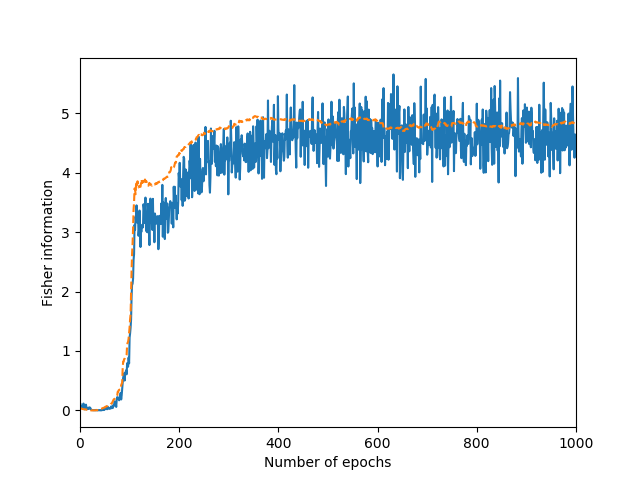

Mean training Fisher over last 10% training epochs =  4.64849
Mean testing Fisher over last 10% training epochs =  4.82369


In [9]:
plt.figure()
plt.plot(train_F)
plt.plot(test_F, linestyle = 'dashed')
plt.xlim([0, len(train_F)])
plt.xlabel('Number of epochs')
plt.ylabel('Fisher information')
print('Mean training Fisher over last 10% training epochs = ', np.mean(train_F[-int(n_epochs * 0.1):]))
print('Mean testing Fisher over last 10% training epochs = ', np.mean(test_F[-int(n_epochs * 0.1):]))

# Test the network

We create some *real* data which we can use to see how well the network has learned how to summarise the data. When using LISA it is easiest to use<br>
> `real_data, noise = t.gravitational_wave_burst(0.1, None, return_noise = True, shaped = False)`

> `real_data_shaped = real_data[np.newaxis, np.newaxis, :]`

since you want the noise for normalisation and you need a shaped array to feed through the network for summaries.

In [10]:
real_data = t.create_data(θ = 1., num = 1, shaped = True)

We need to load the neural networks into the test models to be able to perform the PMC (or any other tests)

In [11]:
t.n = n

## Calculate exact posterior distribution

Since we know how to exactly calculate the posterior distribution for the Gaussian problem we can do that here. If the noise is unknown then a Rao-Blackwell estimation can be made by summing over the posterior with a series of values for the noise. Note that this will not work for the Lyman-α or LISA problems, although the analytic LISA likelihood can be calculated using<br>
> `posterior = t.lnL_grav(real_data, f, noise)`

where  `f` is the central oscillation frequency of interest and noise is the true noise of the real data, used for normalisation in this problem.

In [12]:
real_summary = np.sum(real_data**2.)

In [13]:
theta_values = np.linspace(0.05, 10, 1000)
posterior = np.exp(t.lnL(real_summary, theta_values, 0., 10.))
posterior = posterior / np.max(posterior)

<IPython.core.display.Javascript object>


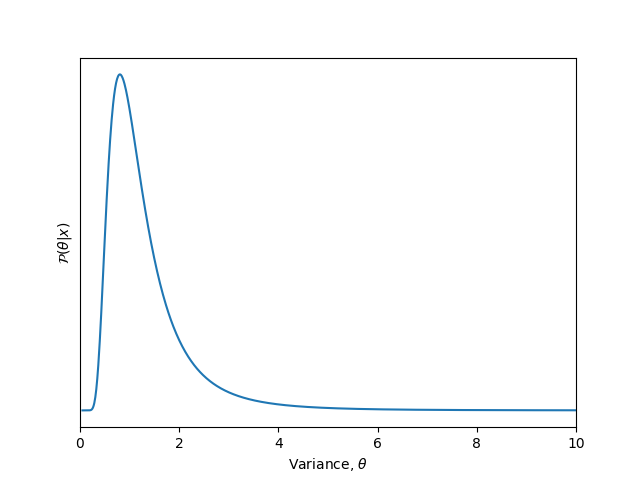

In [14]:
plt.figure()
plt.plot(theta_values, posterior)
plt.xlim([0., 10.])
plt.yticks([])
plt.xlabel('Variance, $\\theta$')
plt.ylabel('$\mathcal{P}(\\theta|x)$');

When using LISA the exact likelihood can be calculated for the network summary as well using <br>
> `network_posterior = t.lnL_grav(real_data_shaped, f, noise, W = W, b = b)`

## First approximation using the network

Without needing to create any more simulations we can consider the first approximation to the posterior distribution using the network to summarise the data by expanding the likelihood to first order. The array between `-1` and `9` are the values of $\Delta\theta$ to calculate the expansion at - this should only be trusted for small values.

In [15]:
n_points = 1000
m2lnL = t.asymptotic_likelihood(W, b, real_data, n.epoch(n.data_for_fisher(train_data))[0: 1], np.linspace(-1., 9., n_points))

<IPython.core.display.Javascript object>


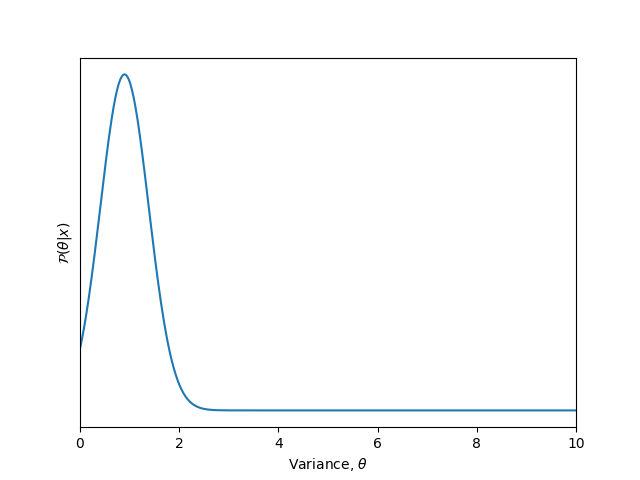

In [16]:
plt.figure()
plt.plot(np.linspace(0., 10., n_points), np.exp(-0.5 * m2lnL), zorder = 1)
plt.xlim([0., 10.])
plt.yticks([])
plt.xlabel('Variance, $\\theta$')
plt.ylabel('$\mathcal{P}(\\theta|x)$');

## ABC

We can also do a naive ABC calculation of the posterior by generating `10000` random draws from a uniform prior (or uniform in natural log for Lyman-α or uniform in $10^x$ for LISA). We can also get the real summary back from the simulations created in the ABC to compare the network summary, although this doesn't work for Lyman-α or LISA.

In [17]:
num_points = 10000
summary, thetas, summaries, rho, r_s = t.ABC(W, b, train_F[-1], real_data, [0., 10.], num_points, real_summary = True)

100%|██████████| 10000/10000 [00:31<00:00, 313.89it/s]


We accept the theta values which are within the closest 1% of the real data. This is an arbitrary choice of epsilon here.

In [18]:
epsilon = 0.01 * (np.max(summaries) - np.min(summaries))
accepted_indices = np.where(np.abs(summaries - summary) < epsilon)[0]
not_accepted_indices = [i for i in range(len(summaries)) if i not in accepted_indices]
accepted_summaries = summaries[accepted_indices]
accepted = thetas[accepted_indices]

The accepted points are plotted in blue and the reject points in orange. The black dashed line shows the network summary of the real data.

<IPython.core.display.Javascript object>


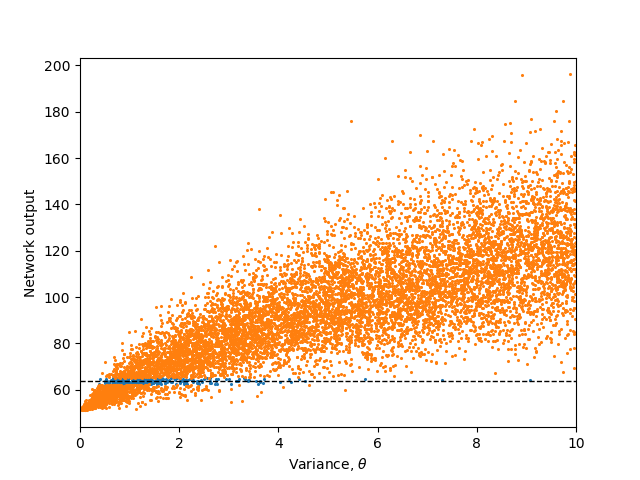

In [19]:
plt.figure()
plt.scatter(accepted, accepted_summaries, s = 5, lw = 0)
plt.scatter(thetas[not_accepted_indices], summaries[not_accepted_indices], s = 5, lw = 0)
plt.plot([0., 10.], [summary, summary], color = 'black', lw = 1, linestyle = 'dashed')
plt.xlim([0., 10.])
plt.xlabel('Variance, $\\theta$')
plt.ylabel('Network output');

# PMC

We can use the population Monte Carlo algorithm to find `1000` samples from the posterior distribution. We can use a criterion to stop the PMC when we are convinced that the distribution has converged. Here we have set the criterion to `0.1`, which means that there needs to be `1000/0.1` draws of the parameter values to get `250` draws moved. This is overkill here, - we use `500` draws and a criterion of `0.5` in the paper.

In [20]:
num_in_posterior = 1000
PMC_S, PMC_t, PMC_ss, PMC_r, PMC_w = t.PMC(W, b, train_F[-1], real_data, [0., 10.], num_points, num_in_posterior, 0.1)

100%|██████████| 1000/1000 [00:03<00:00, 314.81it/s]


1 1383 383 250 2.6109660574412534
2 1900 517 250 1.9342359767891684
3 2569 669 250 1.4947683109118086
4 3424 855 250 1.1695906432748537
5 4408 984 250 1.016260162601626
6 5315 907 250 1.1025358324145536
7 6614 1299 250 0.7698229407236336
8 7974 1360 250 0.7352941176470589
9 9482 1508 250 0.6631299734748011
10 11720 2238 250 0.44682752457551383
11 14003 2283 250 0.43802014892685065
12 17968 3965 250 0.25220680958385877
13 24103 6135 250 0.16299918500407498
14 29282 5179 250 0.19308746862328635
15 36134 6852 250 0.14594279042615294
16 48473 12339 250 0.08104384471999351


The blue points are accepted samples from the posterior distribution defined by the PMC.

<IPython.core.display.Javascript object>


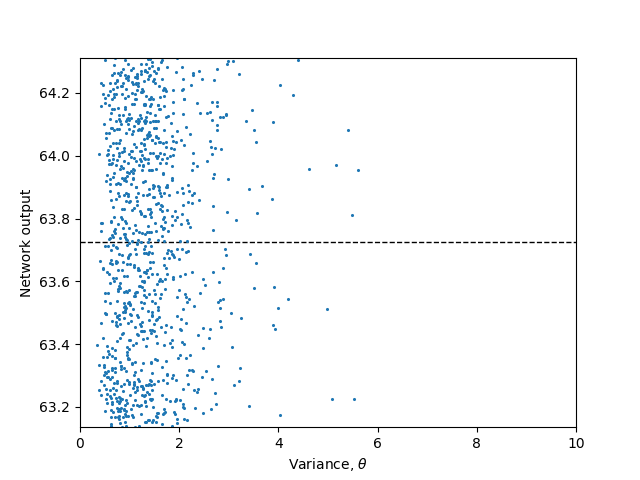

In [21]:
plt.figure()
plt.plot([0., 10.], [PMC_S, PMC_S], color = 'black', lw = 1, linestyle = 'dashed', zorder = 0)
plt.scatter(PMC_t, PMC_ss, s = 5, lw = 0)
plt.xlim([0., 10.])
plt.ylim([np.min(PMC_ss), np.max(PMC_ss)])
plt.xlabel('Variance, $\\theta$')
plt.ylabel('Network output');

## Posterior distribution comparison

We can show the compared posteriors from, exact in orange, first order approximation in blue dashed and from the PMC in the purple histogram. We haven't shown the ABC histogram here, but it will follow the PMC quite closely. We normalise all the posterior distributions according to the histogram.

<IPython.core.display.Javascript object>


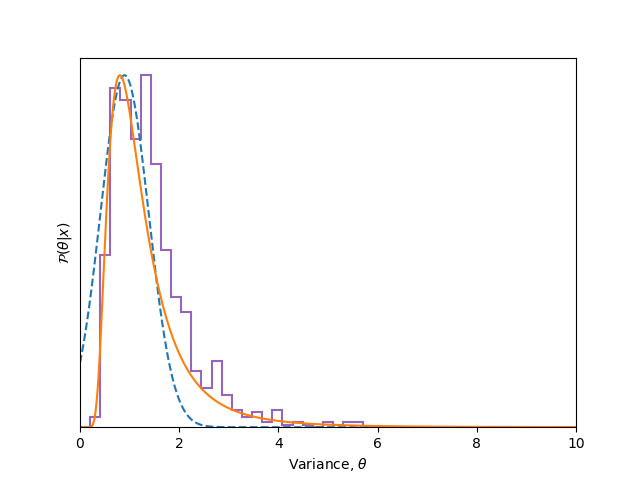

In [27]:
plt.figure()
num_bins = 50
hist, bin_edges, patches = plt.hist(PMC_t, bins = np.linspace(0., 10., num_bins), histtype = u'step', normed = True, linewidth = 1.5, color = '#9467bd')
ind = np.where(hist == np.max(hist))[0][0]
norm = np.mean(hist[ind: ind + 1])
plt.plot(np.linspace(0., 10., n_points), np.exp(-0.5 * m2lnL) / np.max(np.exp(-0.5 * m2lnL))*norm, zorder = 1, color = '#1f77b4', linestyle = 'dashed')
plt.plot(theta_values, posterior * norm, color = '#ff7f0e')
plt.xlim([0., 10.])
plt.yticks([])
plt.xlabel('Variance, $\\theta$')
plt.ylabel('$\mathcal{P}(\\theta|x)$');